In [1]:
import yfinance as yf
import pandas as pd
import tensorflow as tf
from yahoo_fin import news

import nltk
import nltk.sentiment.util
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline
from transformers import BertTokenizer




c:\Users\prakh\OneDrive\Desktop\lstmpricemain\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ticker = 'tsla'
    # Fetch the news data for the given ticker symbol
news_data = news.get_yf_rss(ticker)

    # Convert the list of news articles into a DataFrame
news_df = pd.DataFrame(news_data)
# df =news_df
    # Check available columns in the data
print("Available columns:", news_df.columns)

#     Rename columns for easier readability (optional)
df = news_df[['title', 'link', 'published']].copy()  # Selecting relevant columns
df.rename(columns={'title': 'Headline', 'link': 'Link', 'published': 'DateTime'}, inplace=True)

#     Convert 'DateTime' to pandas datetime format for easier manipulation
df['DateTime'] = pd.to_datetime(df['DateTime'])
df

Available columns: Index(['summary', 'summary_detail', 'id', 'guidislink', 'links', 'link',
       'published', 'published_parsed', 'title', 'title_detail'],
      dtype='object')


,Headline,Link,DateTime
0,Where Will Tesla Be in 10 Years?,https://www.fool.com/investing/2024/12/01/wher...,2024-12-01 10:00:00+00:00
1,Trump’s Commerce Pick Hawked Buzzy Investments...,https://finance.yahoo.com/m/b9b6d331-9a8a-3d47...,2024-12-01 10:00:00+00:00
2,Tesla Stock Holds Near Highs Amid FSD News; BY...,https://finance.yahoo.com/m/29c92e28-b5ab-392e...,2024-12-01 09:52:58+00:00
3,"Is Tesla, Inc. (TSLA) the Best New Pick in Bra...",https://finance.yahoo.com/news/tesla-inc-tsla-...,2024-12-01 06:28:40+00:00
4,Is Tesla Stock a Buy?,https://www.fool.com/investing/2024/11/30/is-t...,2024-11-30 16:00:00+00:00
5,JPMorgan Drops Suit Against Tesla Over Musk Tw...,https://finance.yahoo.com/news/jpmorgan-drops-...,2024-11-30 15:12:26+00:00
6,"Elon Musk's 'animal spirits,' Apple misses out...",https://www.yahoo.com/tech/weekend-tech-innova...,2024-11-30 15:04:53+00:00
7,5 Stocks To Watch in December—And What To Watc...,https://www.investopedia.com/stocks-to-watch-i...,2024-11-30 12:00:00+00:00
8,In the Desert With an EV Entrepreneur Who Insi...,https://finance.yahoo.com/m/c72f41e6-b231-3667...,2024-11-30 10:30:00+00:00
9,"Up 38%, Is Tesla Stock a Buy?",https://www.fool.com/investing/2024/11/30/up-3...,2024-11-30 09:36:00+00:00


In [3]:

# data = yf.Ticker(ticker)
# news = data.news
# news_df = pd.DataFrame(news)
# df1 = ['providerPublishTime', 'title' , 'link']
# df2 = [col for col in df1 if col in news_df]
# df = news_df[df2].copy()
# # df.rename(columns={'title':'Headlines'}, inplace=True)
# df.rename(columns={'providerPublishTime': 'DateTime', 'title': 'Headline', 'link': 'Link'}, inplace=True)
# df['DateTime'] = pd.to_datetime(df['DateTime'], unit='s')
# # df['Date Time'] = pd.to_datetime(df['Date Time'])
# df

In [4]:
_sentiment_analysis = pipeline("sentiment-analysis", model="ProsusAI/finbert")


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at ProsusAI/finbert and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
# text = "The company reported strong earnings growth this quarter, outperforming expectations."

# # Perform sentiment analysis
# result = _sentiment_analysis(text)

# # Output the result
# print(result)

In [6]:
df['finbert_sentiment'] = df['Headline'].apply(_sentiment_analysis)
#

In [7]:
df['finbert_sentiment_score'] = df['finbert_sentiment'].apply(lambda x: {x[0]['label']=='negative': -1, x[0]['label']=='positive': 1}.get(True, 0) * x[0]['score'])
df


,Headline,Link,DateTime,finbert_sentiment,finbert_sentiment_score
0,Where Will Tesla Be in 10 Years?,https://www.fool.com/investing/2024/12/01/wher...,2024-12-01 10:00:00+00:00,"[{'label': 'positive', 'score': 0.391977399587...",0.391977
1,Trump’s Commerce Pick Hawked Buzzy Investments...,https://finance.yahoo.com/m/b9b6d331-9a8a-3d47...,2024-12-01 10:00:00+00:00,"[{'label': 'positive', 'score': 0.411484092473...",0.411484
2,Tesla Stock Holds Near Highs Amid FSD News; BY...,https://finance.yahoo.com/m/29c92e28-b5ab-392e...,2024-12-01 09:52:58+00:00,"[{'label': 'negative', 'score': 0.360616773366...",-0.360617
3,"Is Tesla, Inc. (TSLA) the Best New Pick in Bra...",https://finance.yahoo.com/news/tesla-inc-tsla-...,2024-12-01 06:28:40+00:00,"[{'label': 'negative', 'score': 0.364740759134...",-0.364741
4,Is Tesla Stock a Buy?,https://www.fool.com/investing/2024/11/30/is-t...,2024-11-30 16:00:00+00:00,"[{'label': 'positive', 'score': 0.388070434331...",0.388070
5,JPMorgan Drops Suit Against Tesla Over Musk Tw...,https://finance.yahoo.com/news/jpmorgan-drops-...,2024-11-30 15:12:26+00:00,"[{'label': 'neutral', 'score': 0.4480461180210...",0.000000
6,"Elon Musk's 'animal spirits,' Apple misses out...",https://www.yahoo.com/tech/weekend-tech-innova...,2024-11-30 15:04:53+00:00,"[{'label': 'positive', 'score': 0.383976757526...",0.383977
7,5 Stocks To Watch in December—And What To Watc...,https://www.investopedia.com/stocks-to-watch-i...,2024-11-30 12:00:00+00:00,"[{'label': 'positive', 'score': 0.379089802503...",0.379090
8,In the Desert With an EV Entrepreneur Who Insi...,https://finance.yahoo.com/m/c72f41e6-b231-3667...,2024-11-30 10:30:00+00:00,"[{'label': 'positive', 'score': 0.373353540897...",0.373354
9,"Up 38%, Is Tesla Stock a Buy?",https://www.fool.com/investing/2024/11/30/up-3...,2024-11-30 09:36:00+00:00,"[{'label': 'negative', 'score': 0.360471248626...",-0.360471


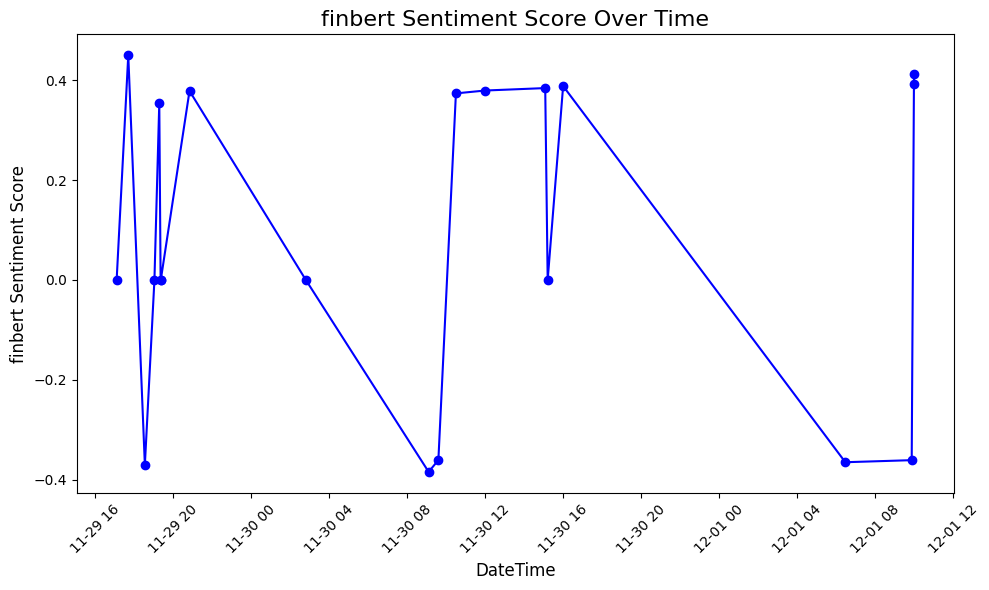

In [8]:
import matplotlib.pyplot as plt

# Assuming df already has 'vader_sentiment_score' and 'Date Time' column
# If 'Date Time' is not already the index, you may need to convert it to a datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Sort the data by Date Time if necessary
df.sort_values('DateTime', inplace=True)

# Plot the sentiment scores over time
plt.figure(figsize=(10, 6))  # Size of the plot

plt.plot(df['DateTime'], df['finbert_sentiment_score'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('finbert Sentiment Score Over Time', fontsize=16)
plt.xlabel('DateTime', fontsize=12)
plt.ylabel('finbert Sentiment Score', fontsize=12)

# Optional: Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [9]:
# df.save('fibert.h5')

In [10]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prakh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
vader = SentimentIntensityAnalyzer()
df['vader_sentiment'] = df['Headline'].apply(vader.polarity_scores)

In [12]:
df['vader_sentiment_score'] = df['vader_sentiment'].apply(lambda x: x['compound'])


In [13]:
# df.save('vader.h5')

In [14]:
df

,Headline,Link,DateTime,finbert_sentiment,finbert_sentiment_score,vader_sentiment,vader_sentiment_score
19,Magnificent Seven Stocks: Nvidia Stock Rebound...,https://finance.yahoo.com/m/4205eaa9-f620-3a0b...,2024-11-29 17:05:42+00:00,"[{'label': 'neutral', 'score': 0.3824206888675...",0.000000,"{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'comp...",0.5994
18,Tesla's AI Push Could Pave Way for $2 Trillion...,https://finance.yahoo.com/news/teslas-ai-push-...,2024-11-29 17:41:28+00:00,"[{'label': 'positive', 'score': 0.449839025735...",0.449839,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
17,"S&P 500, Dow Rally To Record Highs, Dollar Sna...",https://finance.yahoo.com/news/p-500-dow-rally...,2024-11-29 18:32:32+00:00,"[{'label': 'negative', 'score': 0.370241284370...",-0.370241,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
16,"For EV Startups, Things Are Going From Bad to ...",https://finance.yahoo.com/m/7a4347ff-4728-360d...,2024-11-29 19:02:00+00:00,"[{'label': 'neutral', 'score': 0.4733029603958...",0.000000,"{'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'comp...",-0.7650
15,Tesla Stock Finished Black Friday on a High Note,https://www.investopedia.com/tesla-stock-finis...,2024-11-29 19:16:56+00:00,"[{'label': 'positive', 'score': 0.353990644216...",0.353991,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
14,S&P 500 Gains and Losses Today: Index Logs Rec...,https://www.investopedia.com/sandp-500-gains-a...,2024-11-29 19:21:02+00:00,"[{'label': 'neutral', 'score': 0.4063638448715...",0.000000,"{'neg': 0.158, 'neu': 0.702, 'pos': 0.14, 'com...",-0.0772
13,Jim Cramer: Buying Tesla (TSLA) Stock Only Bec...,https://finance.yahoo.com/news/jim-cramer-buyi...,2024-11-29 19:21:33+00:00,"[{'label': 'neutral', 'score': 0.3917183876037...",0.000000,"{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp...",0.4019
12,Tesla Stock Rises to End Its Best Month Since ...,https://finance.yahoo.com/m/577046da-3970-33ee...,2024-11-29 20:50:00+00:00,"[{'label': 'positive', 'score': 0.378270328044...",0.378270,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...",0.6369
11,JPMorgan agrees to drop lawsuit against Tesla ...,https://finance.yahoo.com/news/jpmorgan-agrees...,2024-11-30 02:48:05+00:00,"[{'label': 'neutral', 'score': 0.3991724252700...",0.000000,"{'neg': 0.312, 'neu': 0.547, 'pos': 0.141, 'co...",-0.2960
10,Could Buying Rivian Stock Today Set You Up for...,https://www.fool.com/investing/2024/11/30/coul...,2024-11-30 09:06:00+00:00,"[{'label': 'negative', 'score': 0.384062439203...",-0.384062,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


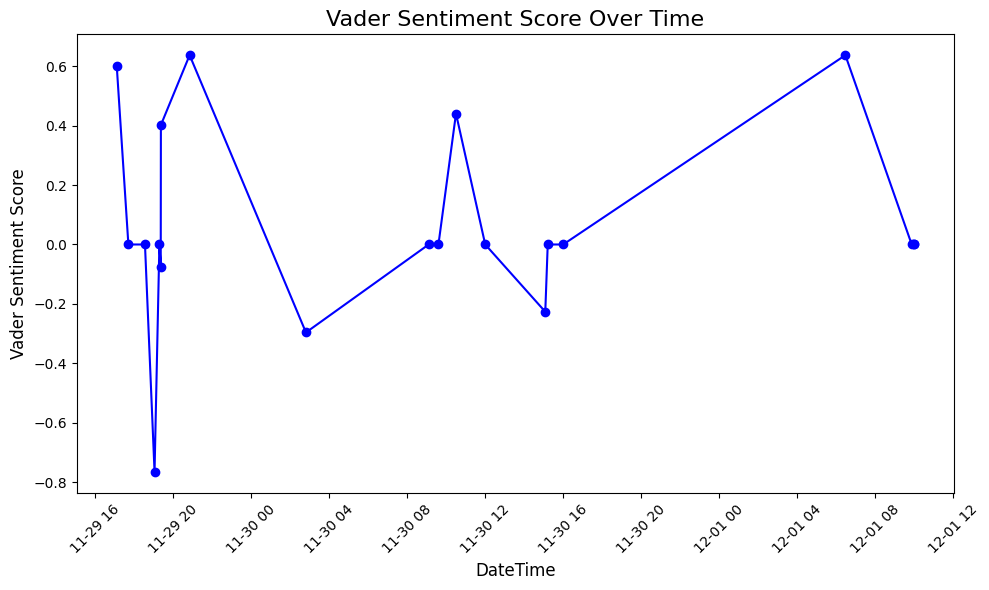

In [19]:
import matplotlib.pyplot as plt

# Assuming df already has 'vader_sentiment_score' and 'Date Time' column
# If 'Date Time' is not already the index, you may need to convert it to a datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Sort the data by Date Time if necessary
df.sort_values('DateTime', inplace=True)

# Plot the sentiment scores over time
plt.figure(figsize=(10, 6))  # Size of the plot

plt.plot(df['DateTime'], df['vader_sentiment_score'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Vader Sentiment Score Over Time', fontsize=16)
plt.xlabel('DateTime', fontsize=12)
plt.ylabel('Vader Sentiment Score', fontsize=12)

# Optional: Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


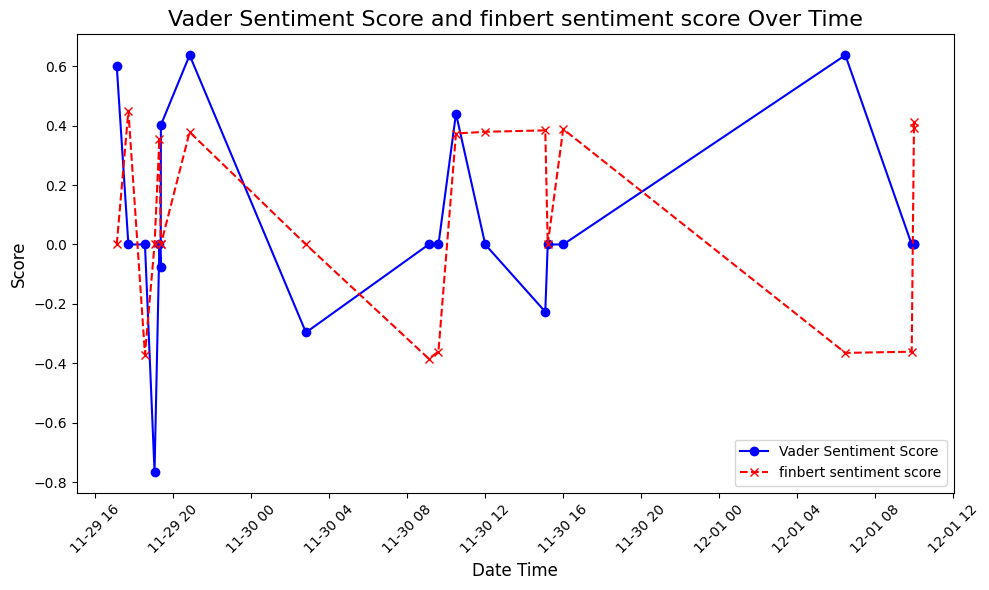

In [20]:
import matplotlib.pyplot as plt

# Assuming df already has 'vader_sentiment_score', 'another_metric', and 'Date Time' columns
df['DateTime'] = pd.to_datetime(df['DateTime'])  # Convert to datetime if necessary
df.sort_values('DateTime', inplace=True)  # Sort by Date Time

# Plot the first graph (Vader Sentiment Score)
plt.figure(figsize=(10, 6))  # Size of the plot
plt.plot(df['DateTime'], df['vader_sentiment_score'], marker='o', linestyle='-', color='b', label='Vader Sentiment Score')

# Plot the second graph (Another metric)
plt.plot(df['DateTime'], df['finbert_sentiment_score'], marker='x', linestyle='--', color='r', label='finbert sentiment score')

# Add labels, title, and legend
plt.title('Vader Sentiment Score and finbert sentiment score Over Time', fontsize=16)
plt.xlabel('Date Time', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend()  # Show legend to differentiate between the two lines

# Optional: Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()
